# CS4055 Project

14161044 - Oliver Gavin

14117495 - Jonathan Lloyd

13148583 - James Conroy

In [6]:
import pandas as pd
import numpy as np

%matplotlib inline

## Dataset Description
(5 marks) Describe the meaning of all attributes in your dataset and cite the source of the dataset.

Source: http://www.gunviolencearchive.org/reports

We should probably combine the data in some way

In [7]:
# accidental_deaths = pd.read_csv('datasets/gun_violence_database/accidental_deaths.csv', parse_dates=['Incident Date'])
accidental_deaths_children = pd.read_csv('gun-violence-database/accidental_deaths_children.csv', parse_dates=['Incident Date'])
accidental_deaths_teens = pd.read_csv('gun-violence-database/accidental_deaths_teens.csv', parse_dates=['Incident Date'])

# accidental_injuries = pd.read_csv('datasets/gun_violence_database/accidental_injuries.csv', parse_dates=['Incident Date'])
accidental_injuries_children = pd.read_csv('gun-violence-database/accidental_injuries_children.csv', parse_dates=['Incident Date'])
accidental_injuries_teens = pd.read_csv('gun-violence-database/accidental_injuries_teens.csv', parse_dates=['Incident Date'])

children_killed = pd.read_csv('gun-violence-database/children_killed.csv', parse_dates=['Incident Date'])
teens_killed = pd.read_csv('gun-violence-database/teens_killed.csv', parse_dates=['Incident Date'])

children_injured = pd.read_csv('gun-violence-database/children_injured.csv', parse_dates=['Incident Date'])
teens_injured = pd.read_csv('gun-violence-database/teens_injured.csv', parse_dates=['Incident Date'])

mass_shootings_2014 = pd.read_csv('gun-violence-database/mass_shootings_2014.csv', parse_dates=['Incident Date'])
mass_shootings_2016 = pd.read_csv('gun-violence-database/mass_shootings_2016.csv', parse_dates=['Incident Date'])
mass_shootings_2015 = pd.read_csv('gun-violence-database/mass_shootings_2015.csv', parse_dates=['Incident Date'])
mass_shootings_2017 = pd.read_csv('gun-violence-database/mass_shootings_2017.csv', parse_dates=['Incident Date'])
# mass_shootings_all = pd.read_csv('gun-violence-database/mass_shootings_all.csv', parse_dates=['Incident Date'])

officer_involved_shootings = pd.read_csv('gun-violence-database/officer_involved_shootings.csv', parse_dates=['Incident Date'])

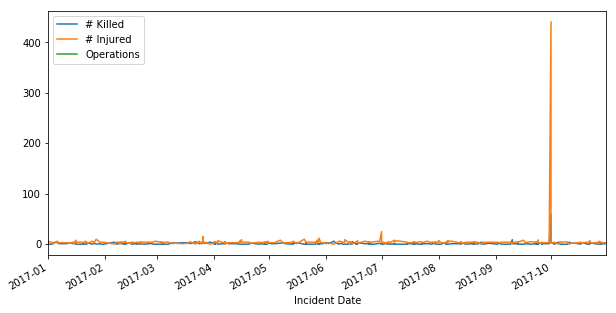

In [3]:
mass_shootings_2017.plot(x='Incident Date', figsize=(10, 5))

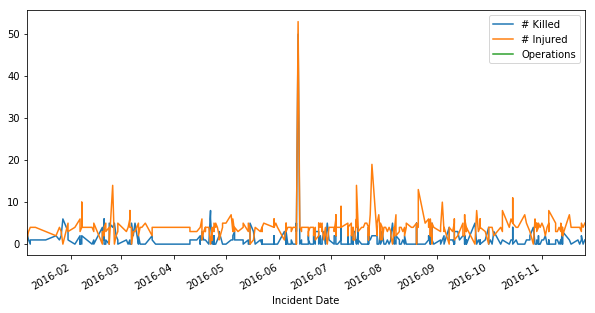

In [4]:
mass_shootings_2016.plot(x='Incident Date', figsize=(10, 5))

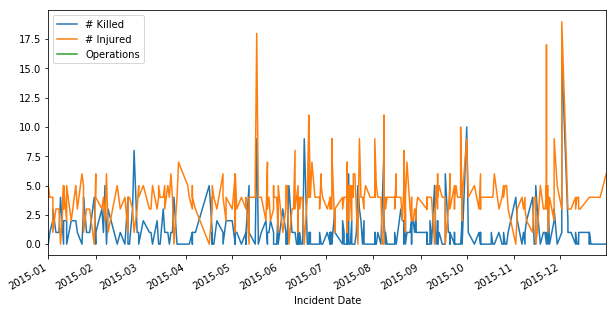

In [5]:
mass_shootings_2015.plot(x='Incident Date', figsize=(10, 5))

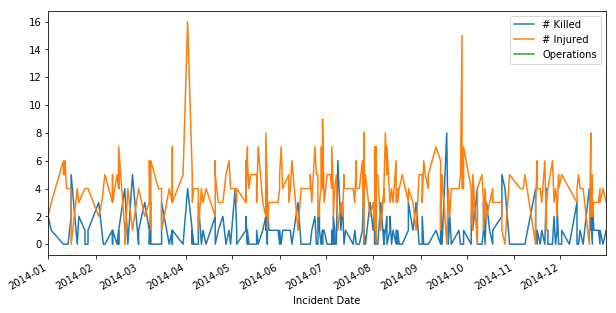

In [19]:
mass_shootings_2014.plot(x='Incident Date', figsize=(10, 5))

## 1. Dataset Preperation
(5 marks)
Pick a dataset with at least 200 data rows and prepare it for data mining. This may include one or more of
the following:

    a. Clean the data: remove outliers, remove corrupt or incorrect data rows, etc.
    b. Discretize some numeric attributes, i.e. transform them to nominal.
    c. Select features (i.e. attributes).

## 2. Predictive Analytics
(30 marks)

• Pick either a nominal class attribute or a numeric attribute and apply a few different data mining
algorithms for building classification and/or numeric prediction models. Tune algorithm parameters and
evaluate the models by following the data mining workflow guidelines in Lecture 9.

• Apply at least one algorithm that has not been covered in class (for example, some of the algorithms in
chapter 6 of Witten, Frank and Hall’s book “Data Mining (Practical Machine Learning Tools and
Techniques)”.

## 3. Descriptive Analytics
(20 marks)

• Discover a meaningful clustering of your dataset. Try k-Means and at least one clustering algorithm that
has not been covered in class.

• Create an insightful visualisation of your dataset.

## Conclusion
(30 marks)

Draw conclusions from your experiments. What did you discover in the data? Are your
discoveries implicit, previously unknown and potentially useful information? Why? Negative results, i.e.
nothing interesting discovered, are acceptable as long as you have shown that you have tried a variety of
algorithms and followed the workflow.